In [1]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt

### 随机生成数据

In [2]:
class TrainDataLoader:
    def __init__(self):
        pass
    def GenerateRandomData(self,count,gradient,offest):
        x1 = np.linspace(1,5,count)
        x2 = gradient*x1 + np.random.randint(-10,10,*x1.shape)+offest
        dataset=[]
        y=[]
        for i in range(*x1.shape):
            dataset.append([x1[i],x2[i]])
            real_value = gradient*x1[i]+offest
            if real_value > x2[i]:
                y.append(-1)
            else:
                y.append(1) 
        return x1,x2,np.mat(y),np.mat(dataset)

In [3]:
class SimplePerceptron:
    def __init__(self,train_data = [],real_result = [],eta=1):
        self.w = np.zeros([1,len(train_data.T)],int)
        self.b = 0
        self.eta = eta
        self.train_data = train_data
        self.real_result = real_result
    def nomalize(self,x):
        if x>0:
            return 1
        else:
            return -1
    def model(self,x):
        #martrix dot multiply
        y =np.dot(x,self.w.T)+self.b
        predict_v = self.nomalize(y)
        return predict_v,y
    def update(self,x,y):
        self.w = self.w+self.eta*y*x
        self.b = self.b+self.eta*y
    def loss(self,fx,y):
        return fx.astype(int)*y
    def train(self,count):
        update_count = 0
        while count >0:
            count -=1
            
            if len(self.train_data)<=0:
                print('Exception')
                break
            #random select train data
            index = randint(0,len(self.train_data)-1)
            x = self.train_data[index]
            y = self.real_result.T[index]
            
            predict_v,linear_y_v =self.model(x)
            if self.loss(y,linear_y_v)>0:
                continue
            update_count = update_count+1
            self.update(x,y)
            #每训练500次，画出当前分类拟合出的曲线
            if(update_count %500 == 0):
                plt.plot(self.train_data.T[0].tolist()[0], 
                         -(np.array(self.train_data.T[0].tolist()[0]).dot(float(self.w.T[0]))
                           +float(self.b))/float(self.w.T[1]), 
                         '--',
                         color='green',
                         alpha=0.5)
        print('update_count:',update_count)
        pass
    def verify(self,verify_data,verify_result):
        size = len(verify_data)
        failed_count = 0
        if size <= 0:
            pass
        for i in range(size):
            x = verify_data[i]
            y = verify_result.T[i]
            if self.loss(y,self.model(x)[1])>0:
                continue
            failed_count += 1
        success_rate = (1.0-(float(failed_count)/size))*100
        print('Success Rate:',success_rate,'%')
        print('All input:',size,"failed_count:",failed_count)
        
    def predict(self,predict_data):
        size = len(predict_data)
        result = []
        if size <=0:
            pass
        for i in range(size):
            x = perdict_data[i]
            result.append(self.model(x)[0])
        return result

### 加载数据

In [4]:
gradient =2
offset = 10
point_num = 1000
train_num = 50000

loader = TrainDataLoader()
x,y,result,train_data = loader.GenerateRandomData(point_num,gradient,offset)
x_t,y_t,test_result,test_data = loader.GenerateRandomData(100,gradient,offset)

### 开始训练并且结果可视化
- 训练集数据用灰色“ * ”
- 验证集数据用蓝色“ + ”
- 红色的线是真实的分类线
- 绿色的线是拟合的分类线
- 绿色虚线是拟合过程间的分类线

update_count: 3287
Success Rate: 100.0 %
All input: 100 failed_count: 0
T1: W:  [[-146.50550551   65.98898899]] b:  [[-585]]


<function matplotlib.pyplot.show>

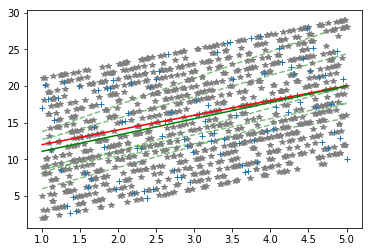

In [7]:
perceptron = SimplePerceptron(train_data,result)
perceptron.train(train_num)
perceptron.verify(test_data,test_result)

print('T1: W: ',perceptron.w,'b: ',perceptron.b)

plt.plot(x,y,'*',color='gray')
plt.plot(x_t,y_t,'+')
plt.plot(x,x.dot(gradient)+offset,color='red')
plt.plot(x, -(x.dot(float(perceptron.w.T[0]))+float(perceptron.b))/float(perceptron.w.T[1]), color='green')
plt.show